<a href="https://colab.research.google.com/github/sgroark/genAI/blob/main/assign1prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generative AI: Assignment 1**

**Problem 2 - Likelihood-Based Classification**

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [ ]:
# Set land points = continent + associated land points

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

# World grid - latitude (-90,90) and longitude (-180,180); step size of 10

grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]


In [ ]:
# Probability of point being land or sea - based on land points vs total land points

def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land

    return P_land, P_sea

# Likelihood of points being land or sea - based on distances to nearest land point

def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    likelihoods_sea = {}

    all_land_points = [point for points in land_points.values() for point in points]

    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]  # Opposite of land

    return likelihoods_land, likelihoods_sea


In [ ]:
# Classifies point as land or sea - based on likelihood of being a land point (threshold > 0.5)

def classify_point(point, likelihoods_land):

    likelihood = likelihoods_land.get(point)
    print(point, likelihood)

    if  likelihood == None:
        return 'No point found'
    elif likelihood >= 0.5:
        return 'Land'
    else:
        return 'Sea'


In [ ]:
def plot_points(land_points, test_points, test_classifications):
    fig, ax = plt.subplots()

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Plot test points
    for point, classification in zip(test_points, test_classifications):
        color = 'green' if classification == 'Land' else 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='red', label=f'Test Point ({classification})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land and Sea Points with Model')
    plt.grid(False)  # Remove grid
    plt.show()


Likelihoods of Test Points: 

(-60, -100) 1.9287498479639178e-22
(20, 30) 1.0
(50, 50) 4.5399929762484854e-05
(60, 100) 1.0
(0, 150) 1.4813063489047343e-08
(80, -160) 1.4454683857335978e-61
(20, 30) 1.0

Test Point Classifications:
Point (-60, -100): Sea
Point (20, 30): Land
Point (50, 50): Sea
Point (60, 100): Land
Point (0, 150): Sea
Point (80, -160): Sea
Point (20, 30): Land


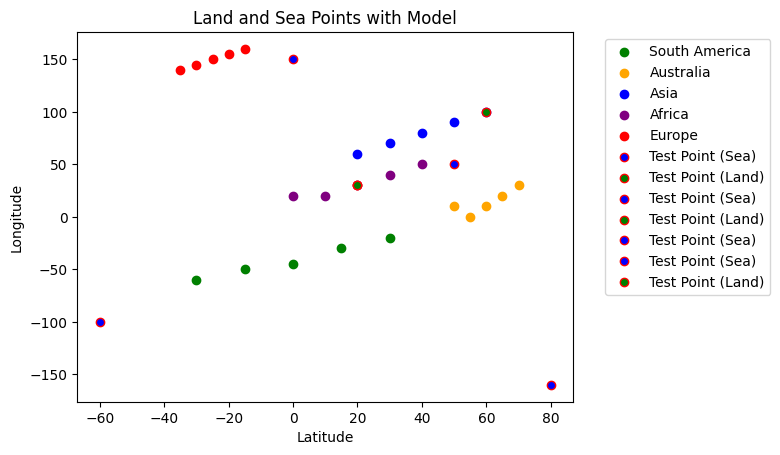

In [ ]:
# Total points in the grid
total_points = len(grid_points)

# Calculate prior probabilities
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Calculate likelihoods
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points)


# Define unknown test cases with more land points and fewer sea points
test_points = [
    # Land points inside the model
    (-60, -100), (20, 30), (50, 50), (60, 100), (0, 150), (80, -160), (20,30)
]

print("Likelihoods of Test Points: \n")
# Classify test points
test_classifications = [classify_point(point, likelihoods_land) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications)
